# Yammer
## Pouya Sharifi

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

%matplotlib inline

## import data

In [2]:
email = pd.read_csv("yammer_emails.csv")
email.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


In [3]:
email['action'].unique()

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

In [4]:
events = pd.read_csv("yammer_events.csv")
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [6]:
users = pd.read_csv("yammer_users.csv")
users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [7]:
events["user_id"].nunique(), users["user_id"].nunique(), email["user_id"].nunique()

(9760, 19066, 6179)

In [10]:
events['event_type'].value_counts()

engagement     321575
signup_flow     19257
Name: event_type, dtype: int64

In [11]:
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [12]:
events['occurred_at'] = pd.to_datetime(events['occurred_at'])

In [13]:
events['week'] = events['occurred_at'].dt.week
events['month'] = events['occurred_at'].dt.month

In [14]:
sum(events['event_type']=='engagement')

321575

In [15]:
aggregation = {'user_id':{'total_users':lambda x:x.nunique()}}
user_id_gb = events[events['event_type']=='engagement'].groupby(by=['user_id', 'week']).agg(aggregation)
week_gb = events[events['event_type']=='engagement'].groupby(by='week').agg(aggregation)
week_gb['week']= week_gb.index
week_gb['users'] = week_gb.iloc[:,0]
week_gb

([<matplotlib.axis.XTick at 0x204bc7d7f60>,
 <a list of 18 Text xticklabel objects>)

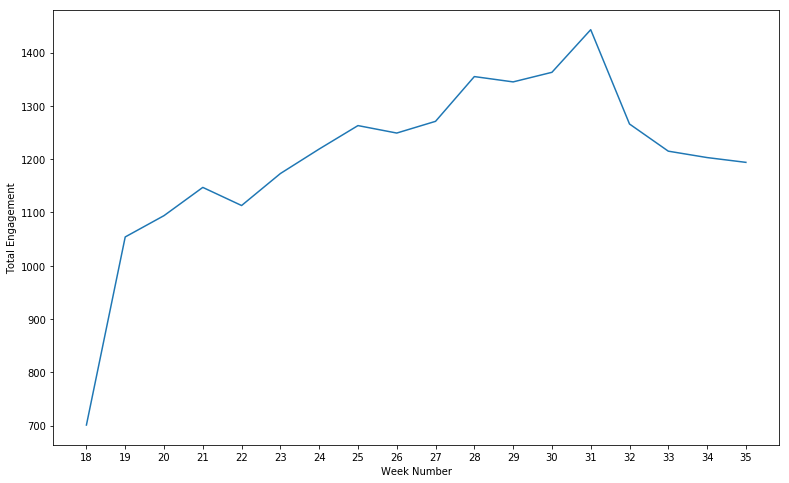

In [133]:
plt.figure(figsize=(13,8))
plt.plot(week_gb['week'], week_gb['users'])
plt.xlabel('Week Number')
plt.ylabel('Total Engagement')
plt.xticks(range(18,36))

### So as we see in the plot above, there is a drop on people engagement after week 31 (start of AUG). Now, we want to test if this drop is significantly high compared to the previous weeks.
### I did one way t test to see if the number of engagements after week 31 is significantly lower than the number of engagements the month before August.

### $H_0$ : $\mu_0 \leq \mu_1$
### $H_1$ : $\mu_0 > \mu_1$

In [134]:
mod1= week_gb[(week_gb['week']<=31) & (week_gb['week']>=27)]
mod2 = week_gb[week_gb['week']>31]

In [138]:
scipy.stats.ttest_ind(mod1['users'], mod2['users'], equal_var=True)
result = scipy.stats.ttest_ind(mod1['users'], mod2['users'])[0]
p_value = scipy.stats.ttest_ind(mod1['users'], mod2['users'])[1]

if (result>0) and (p_value/2 < 0.05):
    print('We reject h null, which we conclude that there is a significant drop after week 31')
else:
    print('We accept h_null')

We reject h null, which we conclude that there is a significant drop after week 31


### Conclusion: we conclude that there is drop in employees' engagement.

In [28]:
aggregation = {'user_id':{'total_users':lambda x:x.nunique()}}

In [29]:
month_gb = events[events['event_type']=='engagement'].groupby(by='month').agg(aggregation)

C:\Users\pouya\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [30]:
month_gb['month'] = ['May', 'June', 'July', 'Aug']
month_gb['num_activity'] = month_gb.iloc[:,0]

In [31]:
month_gb

,user_id,month,num_activity
,total_users,,
month,,,
5,2361.0,May,2361.0
6,2605.0,June,2605.0
7,3058.0,July,3058.0
8,2795.0,Aug,2795.0


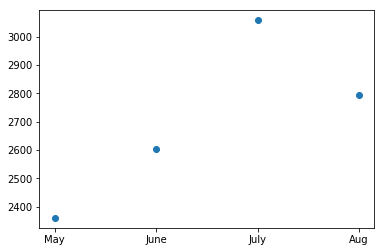

In [32]:
plt.scatter(month_gb['month'], month_gb['num_activity'])

In [33]:
mod1_month = month_gb[month_gb['month']=='July']
mod2_month = month_gb[month_gb['month']=='Aug']

## Now let's take a look at the ratio of number of engaged users to number of activated users

In [140]:
users.head()

,user_id,created_at,company_id,language,activated_at,state,week_activated,week_created
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,1.0,1
1,1.0,2013-01-01 13:07:46,28.0,english,NaT,pending,NaN,1
2,2.0,2013-01-01 10:59:05,51.0,english,NaT,pending,NaN,1
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active,1.0,1
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,1.0,1


In [35]:
users['activated_at'] = pd.to_datetime(users['activated_at'])
users['created_at'] = pd.to_datetime(users['created_at'])
users['week_activated'] = users['activated_at'].dt.week
users['week_created'] = users['created_at'].dt.week

In [141]:
aggregation = {'user_id':{'total_users':lambda x:x.nunique()}}

In [142]:
user_week_activated = users[(users['week_activated']<=35)].groupby(by='week_activated').agg(aggregation)

C:\Users\pouya\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [143]:
user_week_activated = user_week_activated[user_week_activated.index>=18]

([<matplotlib.axis.XTick at 0x204bc894c50>,
 <a list of 18 Text xticklabel objects>)

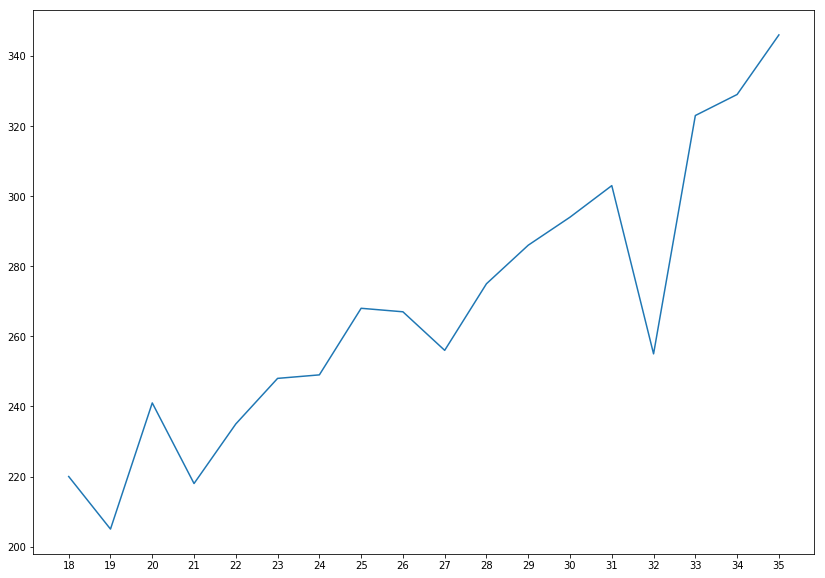

In [144]:
plt.figure(figsize=(14,10))
plt.plot(user_week_activated)
plt.xticks(range(18,36))

### As seen in the plot above, the number of people who created and activated their account decreases on week 32. That might be one of the reasons for engagement drops

## Now let's take a look at the ratio of number of engaged users to number of activated users

ratio = $ numEngagedUsers / numActiveUsers$

### Hypothesis: 
## $\mu_{July} > \mu_{Aug}$

In [145]:
user_week_activated['week'] = user_week_activated.index
user_week_activated['num_active'] = user_week_activated.iloc[:,0]
user_week_activated['num_active'] = user_week_activated['num_active'].cumsum()

In [147]:
user_week_activated['num_active']

week_activated
18.0     220.0
19.0     425.0
20.0     666.0
21.0     884.0
22.0    1119.0
23.0    1367.0
24.0    1616.0
25.0    1884.0
26.0    2151.0
27.0    2407.0
28.0    2682.0
29.0    2968.0
30.0    3262.0
31.0    3565.0
32.0    3820.0
33.0    4143.0
34.0    4472.0
35.0    4818.0
Name: num_active, dtype: float64

In [153]:
group1 = user_week_activated[(user_week_activated['week']<=31) & (user_week_activated['week']>=27)]
group2 = user_week_activated[user_week_activated['week']>31]
mod11 = mod1['users']/group1['num_active']
mod22 = mod2['users']/group2['num_active']

In [154]:
scipy.stats.ttest_ind(mod11, mod22)

Ttest_indResult(statistic=5.608641942320349, pvalue=0.0008086093569188335)

### Here the conclusion is that by looking at the number of active users, the t test becomes more powerful in rejecting the null hypothesis. Thus, There is a significant drop in number of engagements

## ASSUMPTION: I assume that people who activate their account are more likely to be engaged more during the first weeks

## Let's take a look at the engagement of people who activated their account on week 18

In [155]:
week_18_activated = users[users['week_activated'] == 18]['user_id']
week_18_engaged = [i for i in set(events['user_id']) if i in list(week_18_activated.index)]
aggregation = {'event_type':{'engagement':'count'}}
week18_engagedin_week18 = events[events['user_id'].isin(week_18_engaged)].groupby(by=['week']).agg(aggregation)

C:\Users\pouya\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Text(0.5, 1.0, 'Enagement of employees who activated on week 18')

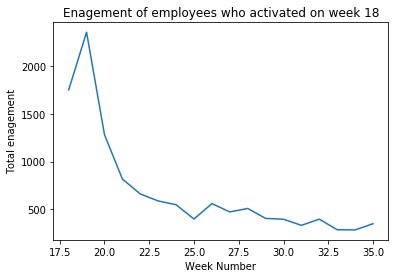

In [162]:
plt.plot(week18_engagedin_week18)
plt.ylabel('Total enagement')
plt.xlabel('Week Number')
plt.title('Enagement of employees who activated on week 18')

## let's take a look at people who activated on week 20

In [157]:
week_20_activated = users[users['week_activated'] == 20]['user_id']
week_20_engaged = [i for i in set(events['user_id']) if i in list(week_20_activated.index)]
week20_engagedin_weeks = events[(events['user_id'].isin(week_20_engaged)) & (events['week']>=20)].groupby(by=['week']).agg(aggregation)

Text(0.5, 1.0, 'Enagement of employees who activated on week 20')

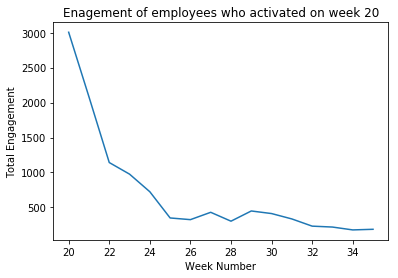

In [165]:
plt.plot(week20_engagedin_weeks)
plt.xlabel('Week Number')
plt.ylabel('Total Engagement')
plt.title('Enagement of employees who activated on week 20')

## week 27

In [159]:
week_27_activated = users[users['week_activated'] == 27]['user_id']
week_27_engaged = [i for i in set(events['user_id']) if i in list(week_27_activated.index)]
week27_engagedin_weeks = events[(events['user_id'].isin(week_27_engaged)) & (events['week']>=27)].groupby(by=['week']).agg(aggregation)

Text(0.5, 1.0, 'Enagement of employees who activated on week 27')

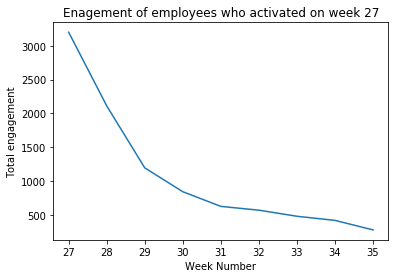

In [166]:
plt.plot(week27_engagedin_weeks)
plt.xlabel('Week Number')
plt.ylabel('Total engagement')
plt.title('Enagement of employees who activated on week 27')

#### Conclusion: These plots show that the engagement of people drops significantly in time after they activate their account
#### with that being said, one of the reasons for low engagement can be the drop of activation on the first week of AUG

In [169]:
df = pd.merge(events, users, how='inner', on='user_id')
df2= pd.merge(df, email, on='user_id')

In [173]:
df2.head()

,user_id,occurred_at_x,event_type,event_name,location,device,user_type_x,week,month,created_at,company_id,language,activated_at,state,week_activated,week_created,occurred_at_y,action,user_type_y
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,18,5,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active,14.0,14,2014-05-02 09:30:00,sent_weekly_digest,3.0
1,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,18,5,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active,14.0,14,2014-05-02 09:30:29,email_open,3.0
2,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,18,5,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active,14.0,14,2014-05-09 09:30:00,sent_weekly_digest,3.0
3,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,18,5,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active,14.0,14,2014-05-16 09:30:00,sent_weekly_digest,3.0
4,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,18,5,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active,14.0,14,2014-05-23 09:30:00,sent_weekly_digest,3.0


In [ ]:
aggregation = {'user_id':{'total_engagement':lambda x:x.nunique()},
              'location':{'location':lambda x:x.value_counts().index[0]},
               'device':{'device': lambda x:x.value_counts().index[0]},
              'company_id':{'company': lambda x:x.value_counts().index[0]}}

In [177]:
aggregation = {'user_id':{'total_engagement':lambda x:x.nunique()},
              'location':{'location':lambda x:x.value_counts().index[0]},
               'device':{'device': lambda x:x.value_counts().index[0]},
              'company_id':{'company': lambda x:x.value_counts().index[0]}}

week_gb = df2[df2['event_type']=='engagement'].groupby(by='week').agg(aggregation)

In [178]:
week_gb

,user_id,location,device,company_id
,total_engagement,location,device,company
week,,,,
18,616.0,United States,macbook pro,1.0
19,967.0,United States,macbook pro,1.0
20,1033.0,United States,macbook pro,1.0
21,1113.0,United States,macbook pro,1.0
22,1096.0,United States,macbook pro,1.0
23,1164.0,United States,macbook pro,1.0
24,1215.0,United States,macbook pro,1.0
25,1261.0,United States,macbook pro,1.0
